In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv(r"C:\Users\geeth\Downloads\googleplaystore.csv")

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


In [7]:
data.shape

(10841, 13)

In [8]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [9]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [10]:
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

In [11]:
data['Installs'] = data['Installs'].str.replace('[+,]', '', regex=True)

In [12]:
data['Price'] = data['Price'].astype(str)

data['Price'] = data['Price'].str.replace(r'\$', '', regex=True).str.strip()

data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

In [13]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'], errors='coerce')

data['Last Updated Day'] = data['Last Updated'].dt.day
data['Last Updated Month'] = data['Last Updated'].dt.month_name()
data['Last Updated Year'] = data['Last Updated'].dt.year

data['Last Updated Day'] = data['Last Updated Day'].astype('Int64')
data['Last Updated Year'] = data['Last Updated Year'].astype('Int64')

In [14]:
median_date = data['Last Updated'].median()

median_day = median_date.day
median_month = median_date.strftime('%B')  
median_year = median_date.year

data['Last Updated Day'] = data['Last Updated Day'].fillna(median_day)
data['Last Updated Month'] = data['Last Updated Month'].fillna(median_month)
data['Last Updated Year'] = data['Last Updated Year'].fillna(median_year)

In [15]:
data['Rating'].fillna(data['Rating'].median(), inplace=True)
data['Type'].fillna(data['Type'].mode()[0], inplace=True)
data['Content Rating'].fillna(data['Content Rating'].mode()[0], inplace=True)
data['Current Ver'].fillna(data['Current Ver'].mode()[0], inplace=True)
data['Android Ver'].fillna(data['Android Ver'].mode()[0], inplace=True)


In [16]:
data.isnull().sum()

App                   0
Category              0
Rating                0
Reviews               1
Size                  0
Installs              0
Type                  0
Price                 1
Content Rating        0
Genres                0
Last Updated          1
Current Ver           0
Android Ver           0
Last Updated Day      0
Last Updated Month    0
Last Updated Year     0
dtype: int64

In [17]:
def size_to_mb(size):
    if isinstance(size, str):
        size = size.strip()
        if size.endswith('M'):
            return float(size[:-1])
        elif size.endswith('k'):
            return float(size[:-1]) / 1024 
    return np.nan 

data['Size_MB'] = data['Size'].apply(size_to_mb)

median_size = data['Size_MB'].median()
data['Size_MB'] = data['Size_MB'].fillna(median_size)

In [18]:
data.isnull().sum()

App                   0
Category              0
Rating                0
Reviews               1
Size                  0
Installs              0
Type                  0
Price                 1
Content Rating        0
Genres                0
Last Updated          1
Current Ver           0
Android Ver           0
Last Updated Day      0
Last Updated Month    0
Last Updated Year     0
Size_MB               0
dtype: int64

In [19]:
data['Reviews'].fillna(0, inplace=True)
data['Price'].fillna(0, inplace=True)

In [20]:
data.drop(['Last Updated', 'Size'], axis=1, inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   App                 10841 non-null  object 
 1   Category            10841 non-null  object 
 2   Rating              10841 non-null  float64
 3   Reviews             10841 non-null  float64
 4   Installs            10841 non-null  object 
 5   Type                10841 non-null  object 
 6   Price               10841 non-null  float64
 7   Content Rating      10841 non-null  object 
 8   Genres              10841 non-null  object 
 9   Current Ver         10841 non-null  object 
 10  Android Ver         10841 non-null  object 
 11  Last Updated Day    10841 non-null  Int64  
 12  Last Updated Month  10841 non-null  object 
 13  Last Updated Year   10841 non-null  Int64  
 14  Size_MB             10841 non-null  float64
dtypes: Int64(2), float64(4), object(9)
memory usage: 1.3+

In [22]:
data.isnull().sum()

App                   0
Category              0
Rating                0
Reviews               0
Installs              0
Type                  0
Price                 0
Content Rating        0
Genres                0
Current Ver           0
Android Ver           0
Last Updated Day      0
Last Updated Month    0
Last Updated Year     0
Size_MB               0
dtype: int64

In [23]:
data.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last Updated Day,Last Updated Month,Last Updated Year,Size_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,January,2018,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,January,2018,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,August,2018,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,June,2018,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,June,2018,2.8


In [24]:
data.describe()

,Rating,Reviews,Price,Last Updated Day,Last Updated Year,Size_MB
count,10841.000000,1.084100e+04,10841.000000,10841.0,10841.0,10841.000000
mean,4.207841,4.441119e+05,1.027273,15.609815,2017.399779,20.183870
std,0.500893,2.927629e+06,15.948971,9.561519,1.100879,20.976262
min,1.000000,0.000000e+00,0.000000,1.0,2010.0,0.008301
25%,4.100000,3.800000e+01,0.000000,6.0,2017.0,5.900000
50%,4.300000,2.094000e+03,0.000000,16.0,2018.0,13.000000
75%,4.500000,5.476800e+04,0.000000,24.0,2018.0,26.000000
max,19.000000,7.815831e+07,400.000000,31.0,2018.0,100.000000


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Ratings

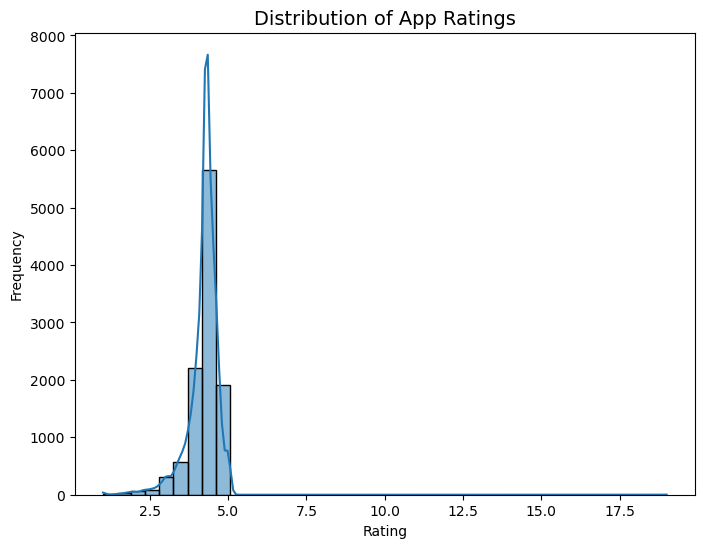

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Rating'], bins=40, kde=True)
plt.title('Distribution of App Ratings', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

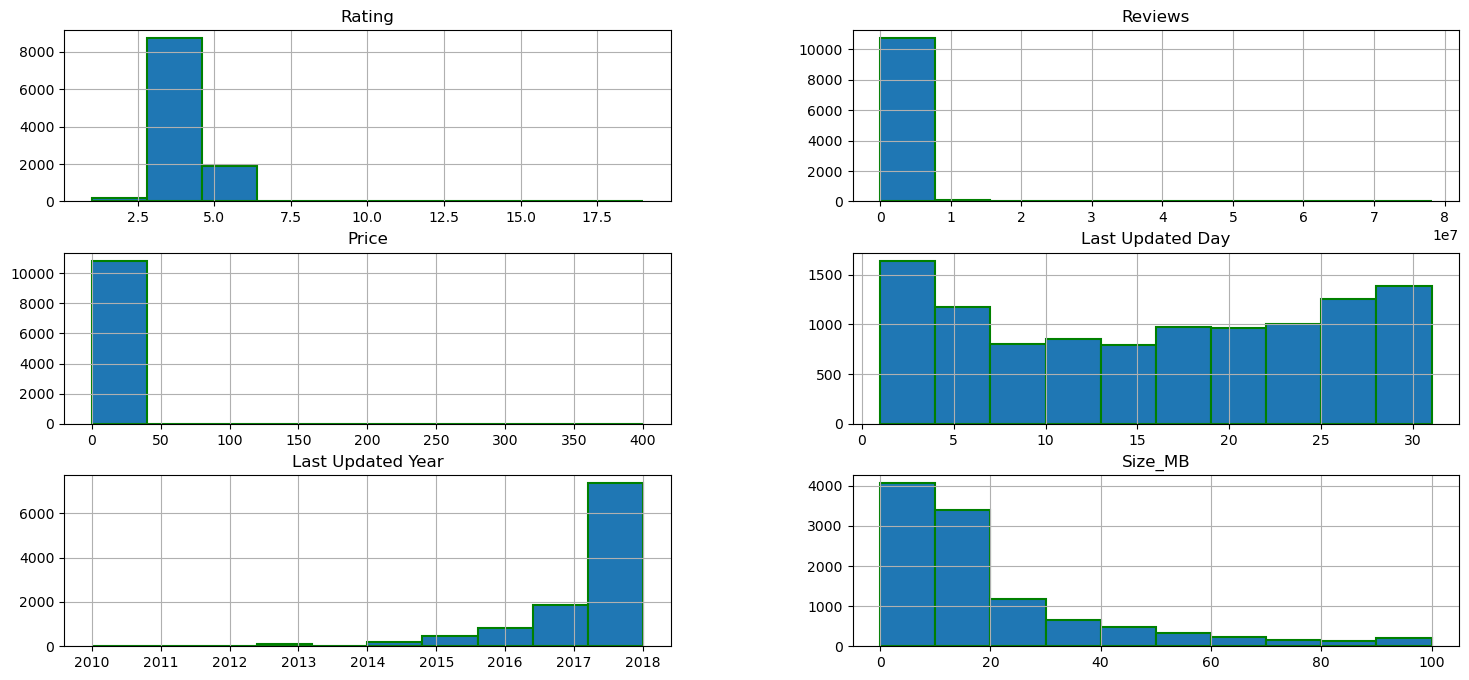

In [27]:
data.hist(edgecolor='green', linewidth=1.5, figsize=(18,8));
plt.show()

# Rating Vs Reviews

Text(0.5, 1.0, 'Rating vs. Number of Reviews')

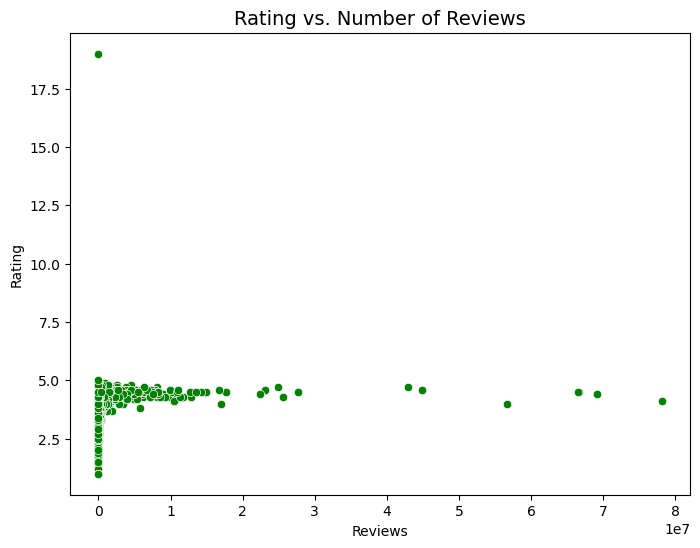

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Reviews', y='Rating', data=data, color = "green")
plt.title('Rating vs. Number of Reviews', fontsize=14)

# Category vs Frequency

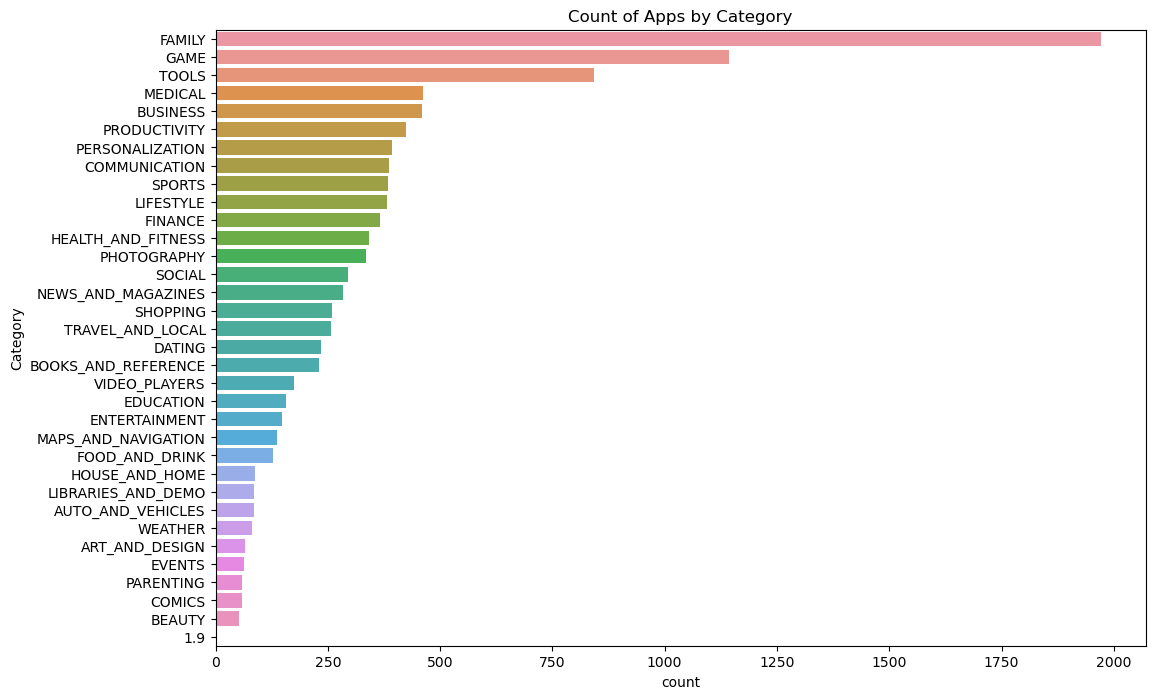

In [29]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Category', data=data,
order=data['Category'].value_counts().index)
plt.title('Count of Apps by Category')
plt.show()

# Categorical Analysis
Top Categories by Count and Average

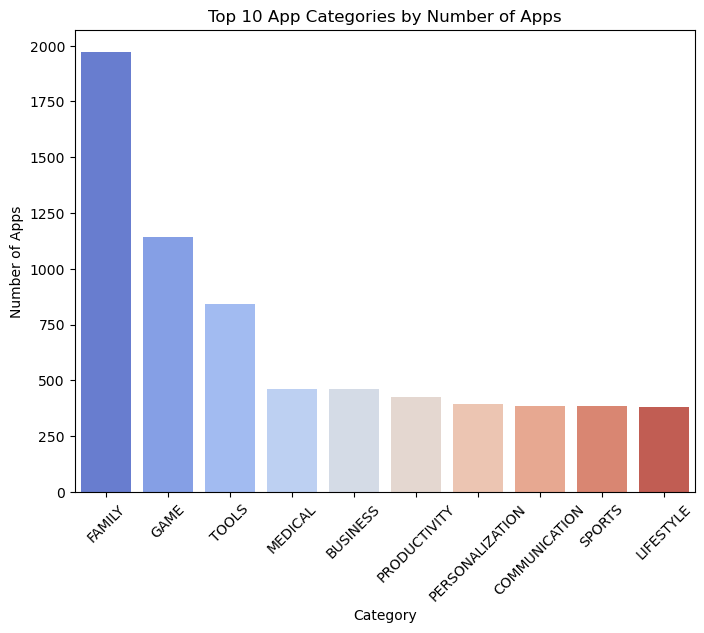

In [30]:
plt.figure(figsize=(8,6))
top_categories = data['Category'].value_counts().head(10)
sns.barplot(x=top_categories.index, y=top_categories.values,
palette='coolwarm')
plt.title('Top 10 App Categories by Number of Apps')
plt.ylabel('Number of Apps')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

# Paid vs Free App Count

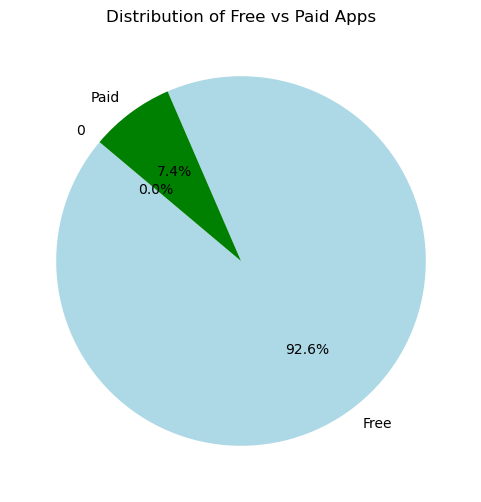

In [31]:
plt.figure(figsize=(6, 6))
data['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['Lightblue', 'Green'], startangle=140)
plt.title('Distribution of Free vs Paid Apps')
plt.ylabel('')
plt.show()

# Size Comparison (Paid VS Free)

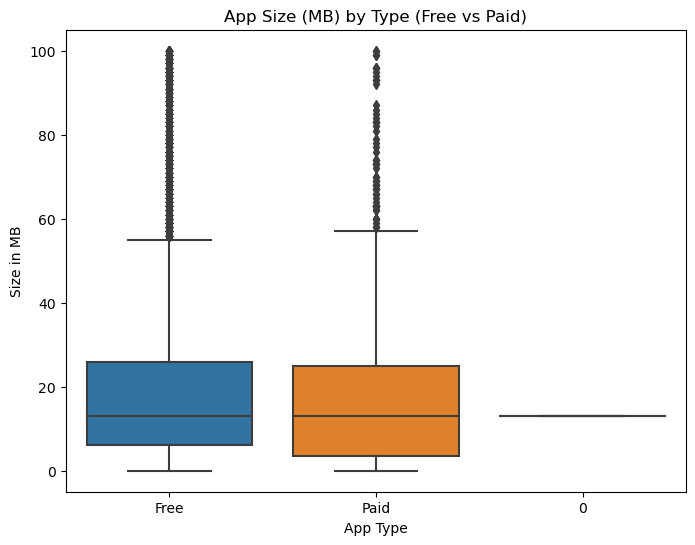

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Size_MB', data=data)
plt.title('App Size (MB) by Type (Free vs Paid)')
plt.xlabel('App Type')
plt.ylabel('Size in MB')
plt.show()

# Price Distribution for Paid Apps

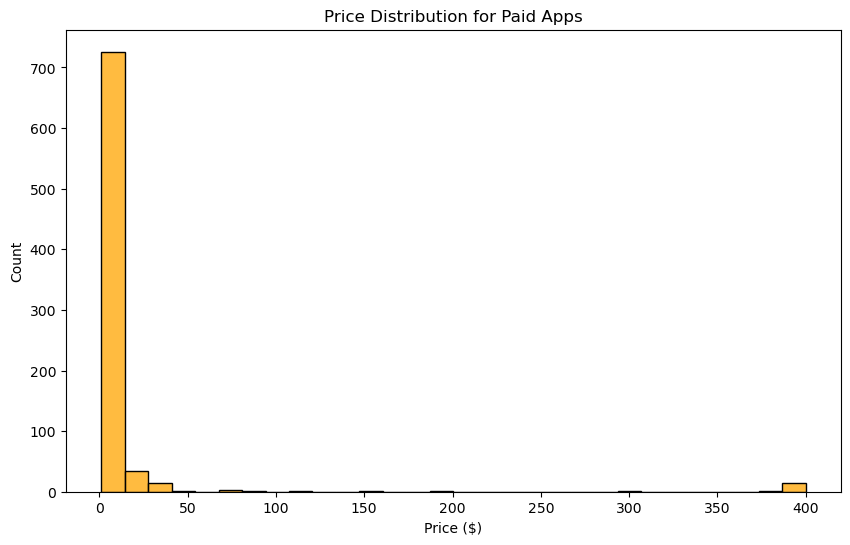

In [33]:
paid_apps = data[data['Type'] == 'Paid']
plt.figure(figsize=(10,6))
sns.histplot(paid_apps['Price'], bins=30, color='orange')
plt.title('Price Distribution for Paid Apps')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()

# Distribution of Content Ratings (Count of Apps per Rating)

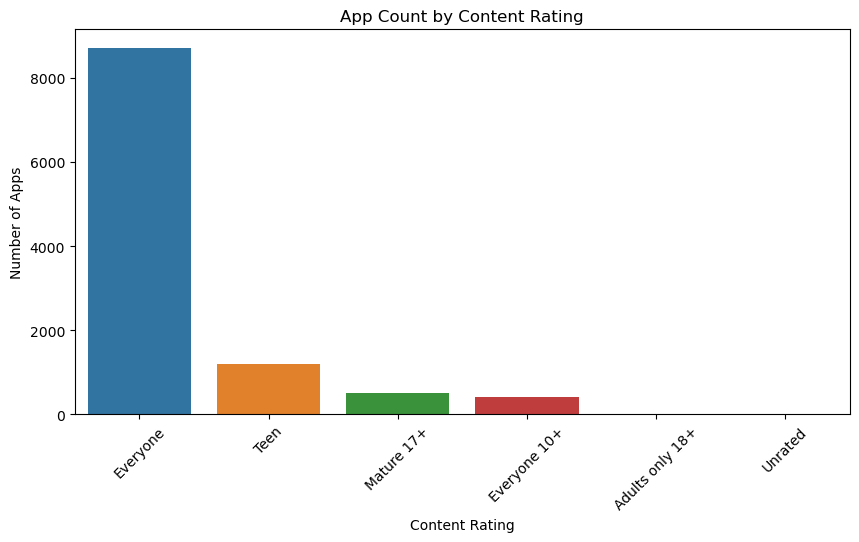

In [34]:
plt.figure(figsize=(10, 5))
content_counts = data['Content Rating'].value_counts()
sns.barplot(x=content_counts.index, y=content_counts.values)
plt.title('App Count by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.show()

# Price vs Rating

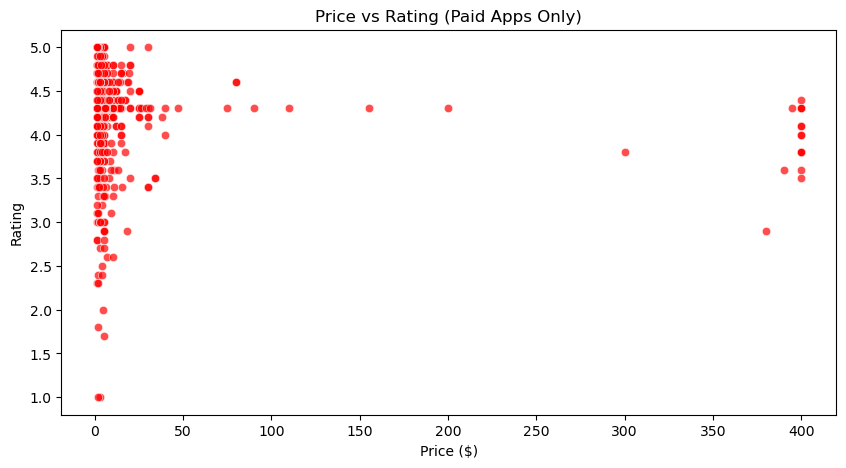

In [35]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data[data['Price'] > 0], x='Price', y='Rating', color='red', alpha=0.7)
plt.title('Price vs Rating (Paid Apps Only)')
plt.xlabel('Price ($)')
plt.ylabel('Rating')
plt.show()

# Rating vs Installs

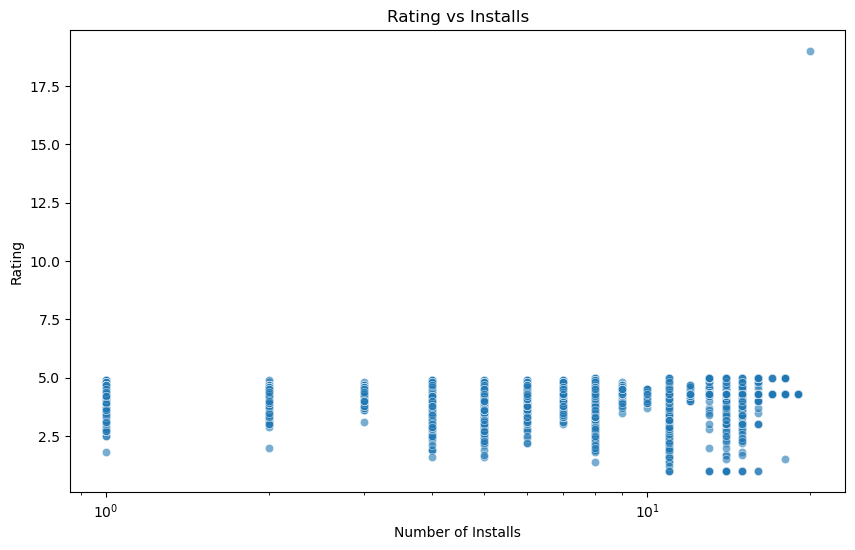

In [36]:
# data['Installs'] = data['Installs'].str.replace(',', '').str.replace('+', '').astype(int)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Installs', y='Rating', data=data, alpha=0.6)
plt.title('Rating vs Installs')
plt.xlabel('Number of Installs')
plt.ylabel('Rating')
plt.xscale('log')  # Log scale for better readability
plt.show()


# Price Distribution (Paid Apps Only)

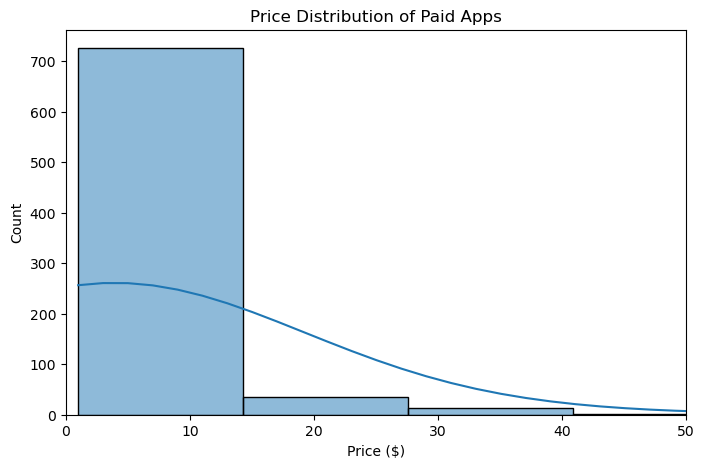

In [37]:
plt.figure(figsize=(8, 5))
sns.histplot(paid_apps['Price'], bins=30, kde=True)
plt.title('Price Distribution of Paid Apps')
plt.xlabel('Price ($)')
plt.xlim(0, 50)  # Ignore outliers for clarity
plt.show()


# Heatmap of Correlation Between Numeric Features

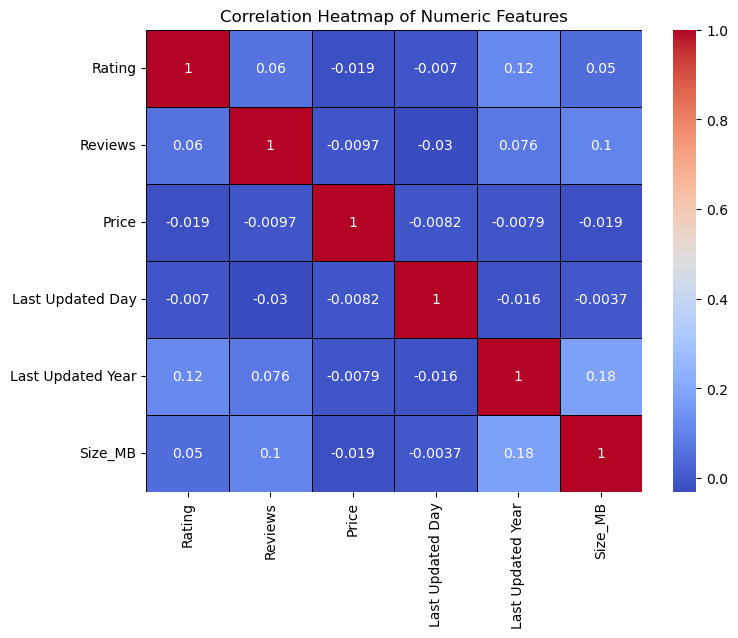

In [38]:
plt.figure(figsize=(8, 6))
numeric_cols = data.select_dtypes(include=['float64', 'int64', 'Int64']).copy()
corr = numeric_cols.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')  
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Year-wise Update Trends

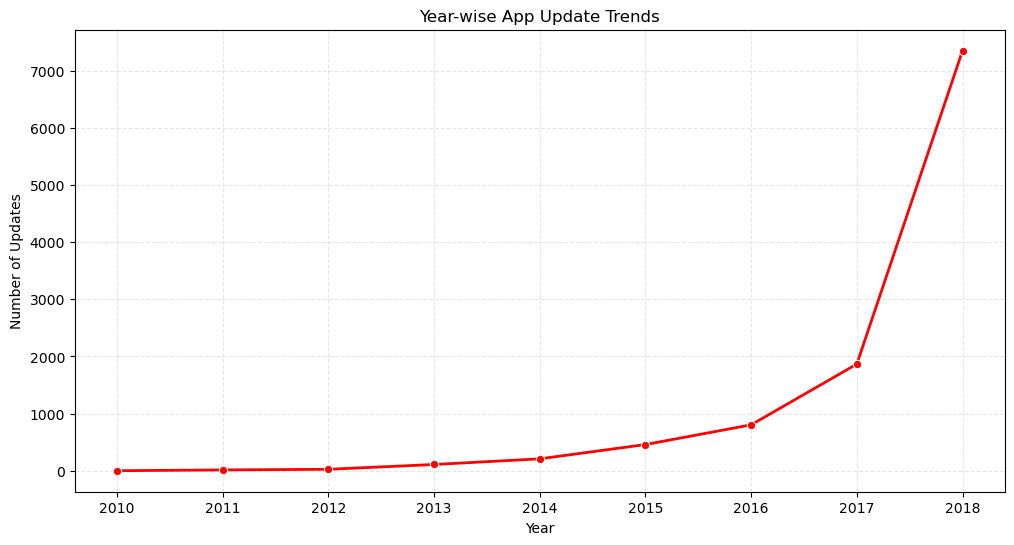

In [39]:
plt.figure(figsize=(12, 6))
data['Last Updated Year'] = data['Last Updated Year'].astype(int)  # Ensure it's an integer type
year_counts = data['Last Updated Year'].value_counts().sort_index()

sns.lineplot(x=year_counts.index, y=year_counts.values, color='red', marker='o', linestyle='-', linewidth=2)
plt.title('Year-wise App Update Trends')
plt.xlabel('Year')
plt.ylabel('Number of Updates')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# Seasonality (Monthly Update Trends)

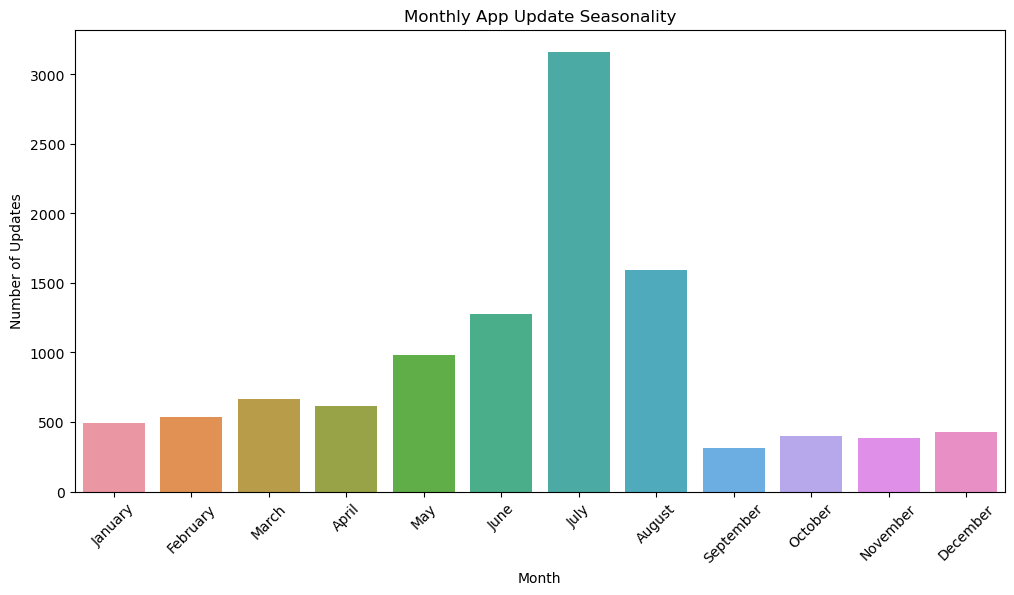

In [40]:
plt.figure(figsize=(12, 6))
month_counts = data['Last Updated Month'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

sns.barplot(x=month_counts.index, y=month_counts.values)
plt.title('Monthly App Update Seasonality')
plt.xlabel('Month')
plt.ylabel('Number of Updates')
plt.xticks(rotation=45)
plt.show()

In [44]:
# Drop rows with missing values in selected categorical columns
clean_data = data.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'])

# Shape before and after cleaning
original_shape = data.shape
cleaned_shape = clean_data.shape

original_shape, cleaned_shape


((10841, 15), (10841, 15))

In [45]:
data.to_csv("googleplaystore_cleaned.csv", index=False)
